In [ ]:
# ! pip install ultralytics

   ---------------------------------------- 0.0/898.8 kB ? eta -:--:--
   ---------------------------------------- 898.8/898.8 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\yulic\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:07<00:00, 6.65MB/s]


In [3]:
model.info()

YOLOv8m summary: 295 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs


(295, 25902640, 0, 79.3204224)

In [4]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_

In [19]:
results = model.predict('tests.jpg')
print(results)


image 1/1 c:\My projects\DS\13_Mod\tests.jpg: 640x544 2 persons, 2 cups, 2 potted plants, 2 laptops, 3 clocks, 4 vases, 193.2ms
Speed: 2.5ms preprocess, 193.2ms inference, 11.1ms postprocess per image at shape (1, 3, 640, 544)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'f

In [20]:
for box in results[0].boxes:
    print('Object type:', box.cls)
    print('Coodrdinates:', box.xyxy)
    print('Probability:', box.conf)
    print('----')

Object type: tensor([0.])
Coodrdinates: tensor([[ 438.1667,   24.1253, 1145.1962,  620.8007]])
Probability: tensor([0.9091])
----
Object type: tensor([0.])
Coodrdinates: tensor([[ 435.3355,  759.1238, 1145.4429, 1382.6588]])
Probability: tensor([0.8534])
----
Object type: tensor([41.])
Coodrdinates: tensor([[ 680.5809, 1105.1112,  777.5338, 1249.7759]])
Probability: tensor([0.8515])
----
Object type: tensor([41.])
Coodrdinates: tensor([[681.2885, 361.3429, 788.2133, 508.1680]])
Probability: tensor([0.8383])
----
Object type: tensor([63.])
Coodrdinates: tensor([[ 79.6923, 329.5240, 448.7765, 578.6617]])
Probability: tensor([0.8267])
----
Object type: tensor([63.])
Coodrdinates: tensor([[  79.7931, 1074.2483,  459.1603, 1341.8677]])
Probability: tensor([0.7984])
----
Object type: tensor([75.])
Coodrdinates: tensor([[526.0686,  75.7540, 584.5015, 189.3000]])
Probability: tensor([0.6872])
----
Object type: tensor([75.])
Coodrdinates: tensor([[250.0435,  73.0658, 307.8158, 186.0030]])
Proba

In [ ]:
 # ! pip install pillow

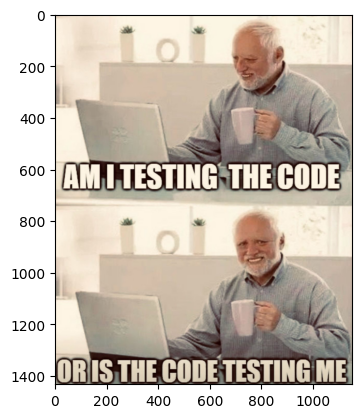

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = np.array(Image.open('tests.jpg'), dtype=np.uint8)
plt.imshow(im)

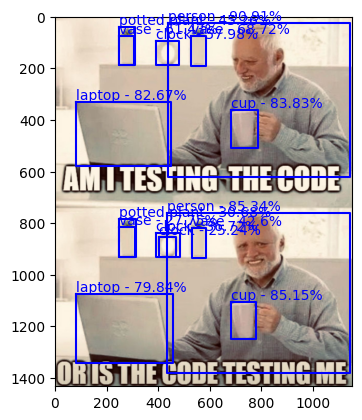

In [22]:
plt.imshow(im)

for box in results[0].boxes:

  cords = box.xyxy[0].tolist()
  xs = [cords[0], cords[2], cords[2], cords[0], cords[0]]
  ys = [cords[1], cords[1], cords[3], cords[3], cords[1]]

  plt.text(cords[0], cords[1]-10, f'{results[0].names[int(box.cls)]} - {round(100*box.conf[0].item(), 2)}%', color='blue')
  plt.plot(xs, ys, color='blue')